In [1]:
import pandas as pd
from scipy.stats import trim_mean
from scipy import stats
import numpy as np
import wquantiles as wq
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
#import pylab as py

### Sampling distribution of a Statistic

In [2]:
loans_income = pd.read_csv('loans_income.csv')

In [3]:
sample_data = pd.DataFrame({'income': [loans_income.sample(1000)], 'type': 'Data'})
sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})
sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(10).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

In [4]:
sample_data

,income,type
0,x 18333 65000 38297 40000 4019...,Data


In [5]:
type(loans_income)

pandas.core.frame.DataFrame

In [6]:
loans_income

,x
0,67000
1,52000
2,100000
3,78762
4,37041
...,...
49995,40000
49996,54000
49997,50000
49998,82000


### Standard Normal and QQ-Plots

#### Probability plot

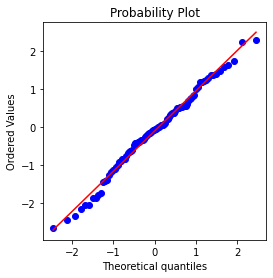

In [13]:
np.random.seed(2)
fig, ax = plt.subplots(figsize = (4, 4))
norm_sample = stats.norm.rvs(size = 100)
stats.probplot(norm_sample, plot = ax);

#### Quantile quantile plot

c:\users\henrikh\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


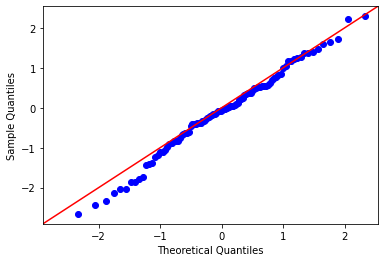

In [20]:
np.random.seed(2)
data_points = np.random.normal(0, 1, 100)
sm.qqplot(data_points, line = '45', loc = 0, scale = 1)
plt.show()

### Long-Tailed Distributions

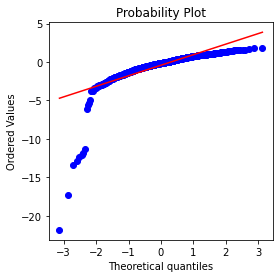

In [9]:
sp500_px = pd.read_csv("sp500_data.csv", delimiter = ',');
nflx = sp500_px.NFLX # this automatically converts csv column data to numpy array
nflx = np.diff(np.log(nflx[nflx>0]))
nflx = np.log(nflx[nflx>0])
fig, ax = plt.subplots(figsize = (4,4))
stats.probplot(nflx, plot = ax);

#### Plot with only log

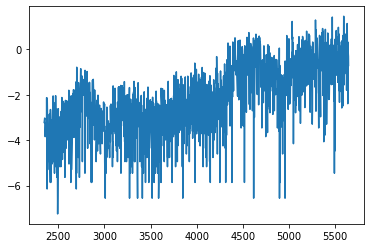

In [28]:
nflx = sp500_px.NFLX # this automatically converts csv column data to numpy array
nflx = np.log(nflx[nflx>0])
plt.plot(nflx)

#### Plot with diff(log)

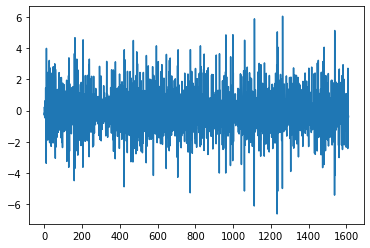

In [32]:
nflx = sp500_px.NFLX # this automatically converts csv column data to numpy array
nflx = np.diff(np.log(nflx[nflx>0]))
plt.plot(nflx)

### Binomial distribution

In [33]:
stats.binom.pmf(2, n = 5, p = 0.1)

0.0729

In [34]:
stats.binom.cdf(2, n = 5, p = 0.1)

0.99144